In [1]:
# import data seta 
file="/content/Telco-Customer-Churn.csv"
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
missing_values = ["n/a", "na", "--"," "]
#df=pd.read_csv(file,na_values=missing_values)
df=pd.read_csv(file)

In [3]:
#top few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# display data as metrix
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# convert to numeric
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
#location of null values
df.loc[df["TotalCharges"].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<Axes: >

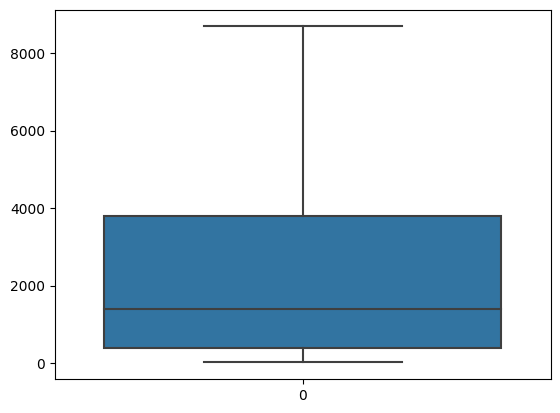

In [11]:
#outliers checking before fill up null values
import seaborn as sys
sys.boxplot(df['TotalCharges'])

<Axes: >

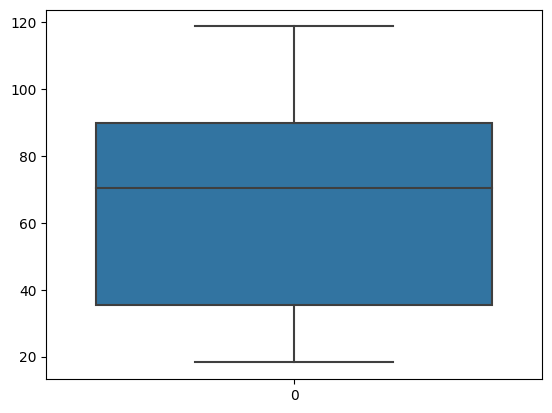

In [12]:
sys.boxplot(df['MonthlyCharges'])

In [13]:
#fill null values
mean=df['TotalCharges'].mean()

In [14]:
df['TotalCharges'].fillna(mean, inplace=True)

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
#remove columns
df.drop(columns= ['customerID'], axis=1, inplace=True)

In [17]:
#visulaize count of churn and not churn for each independent variable
#please wait for few mins until it loads all graphs and charts
import seaborn as sys

In [18]:
for i in (df):
  
    plt.figure(i)
    sys.catplot(data=df,x=i,hue='Churn',kind='count',palette="ch:.35")
# plotting correlation heatmap
dataplot = sys.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()


In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
import numpy  as np
df['Churn'] = np.where(df.Churn == 'Yes',1,0)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [21]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [22]:
#dummy the dataframe to convert categorical variables into numerical variables for further analysis 
df_dummy = pd.get_dummies(df)

In [23]:
df_dummy

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [24]:
#dataplot=sys.heatmap(df_dummy.corr())
#plt.show()

<Axes: >

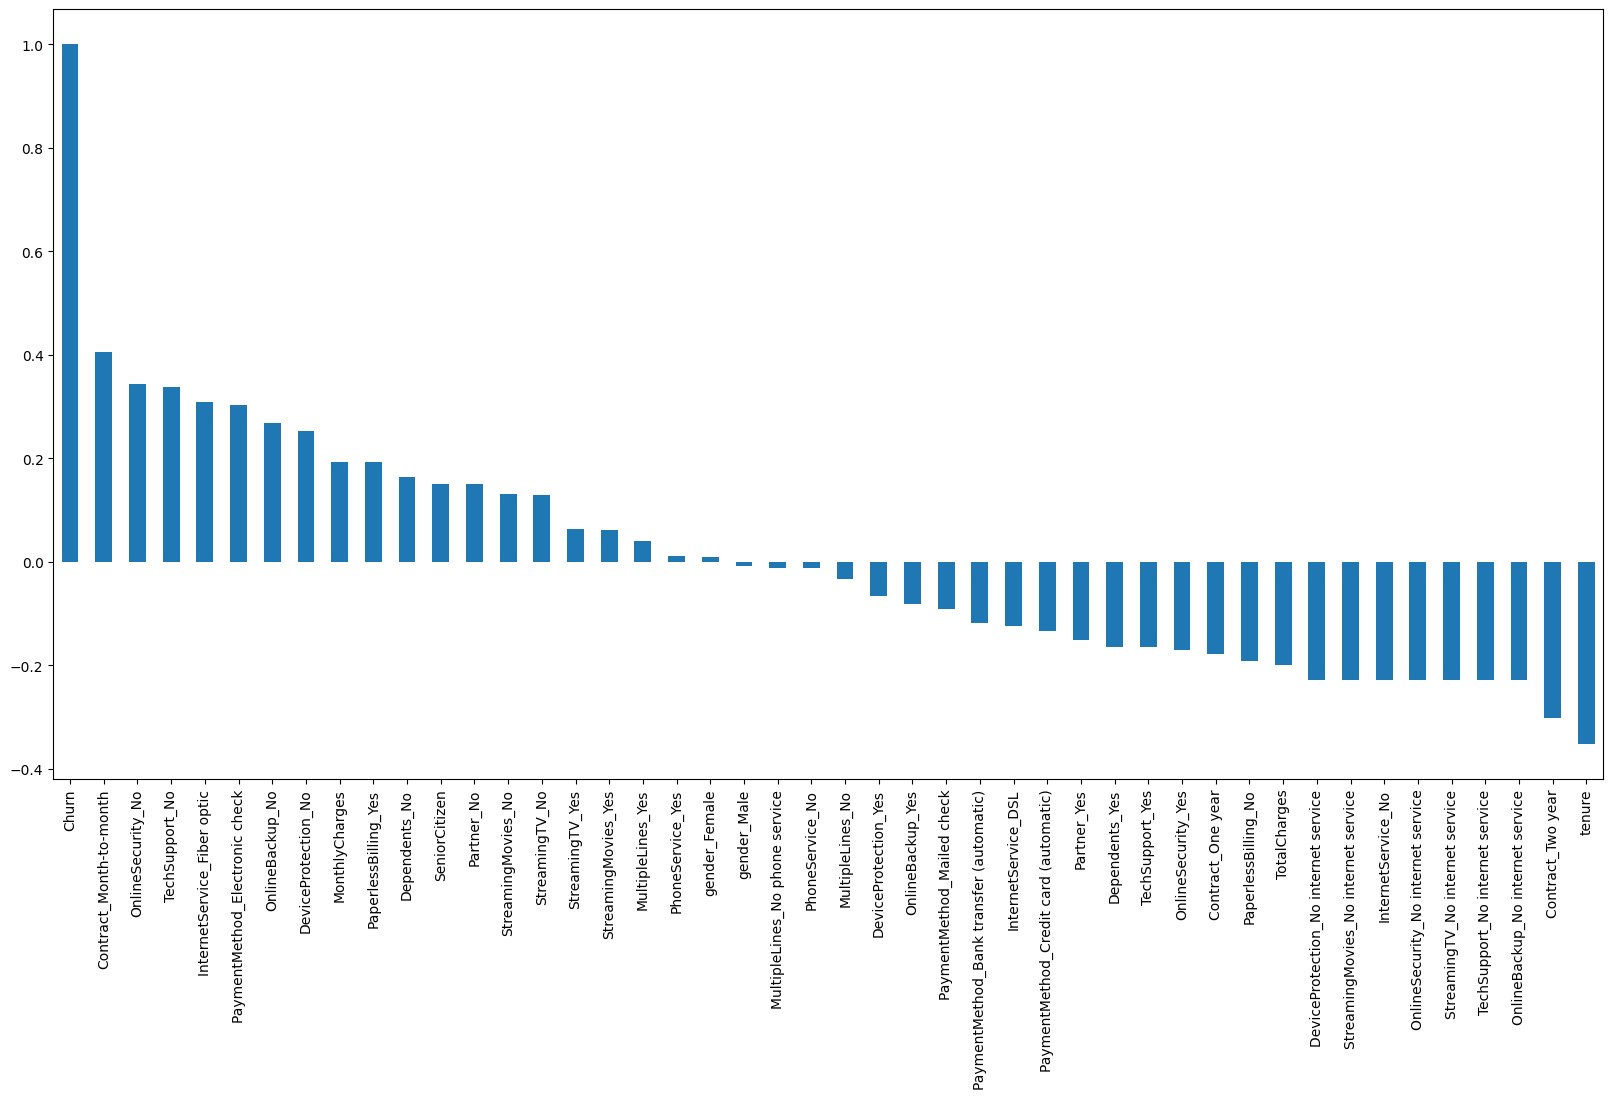

In [25]:
# correlation with churn column plotting for each and every variable in dummy df
plt.figure(figsize=(20,10))
df_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


In [26]:
#numerically represents correlation with churn class attribute
df_dummy.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

In [27]:
# modified data frame import as a csv
df_dummy.to_csv('new_churn.csv')

In [28]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [29]:
#open newly created csv
df_model=pd.read_csv("/content/new_churn.csv")
df_model

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,34,56.95,1889.50,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,0,2,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,3,0,45,42.30,1840.75,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,4,0,2,70.70,151.65,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,24,84.80,1990.50,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,7039,0,72,103.20,7362.90,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,7040,0,11,29.60,346.45,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,7041,1,4,74.40,306.60,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [30]:
#drop the nunamed column
df_model=df_model.drop("Unnamed: 0",axis=1)

In [31]:
x_values=df_model.drop("Churn",axis=1)

In [32]:
y_value=df_model["Churn"]
y_value

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [33]:
# breaking x,y into test and train (test- 20% train-80%)
x_train,x_test,y_train,y_test=train_test_split(x_values,y_value,test_size=0.2)

Text(0.5, 1.0, 'churn column')

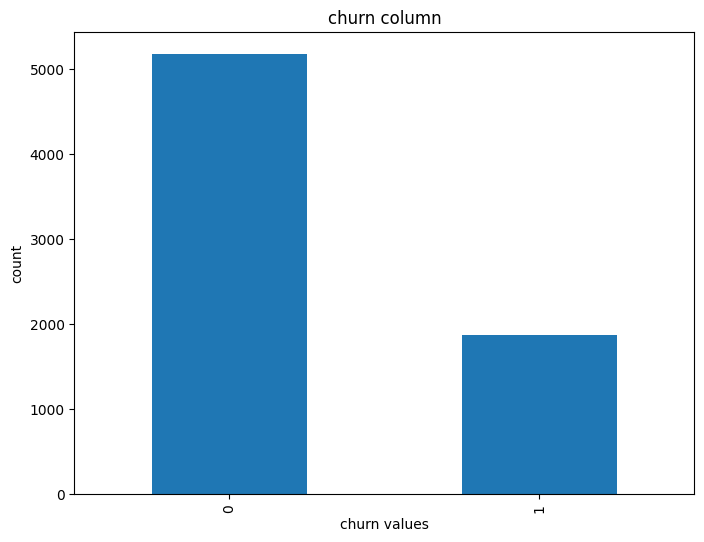

In [34]:
# checking how many churn and non churned customes are there
y_value.value_counts().plot(kind='bar',figsize=(8,6))
plt.xlabel("churn values")
plt.ylabel("count")
plt.title("churn column")

In [35]:
#checking balance of data set
100* y_value.value_counts()/len(y_value)

0    73.463013
1    26.536987
Name: Churn, dtype: float64

In [36]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x_values,y_value)

In [37]:
#checking rebalanced data percentage of churn class
100* y_resampled.value_counts()/len(y_resampled)

1    55.296896
0    44.703104
Name: Churn, dtype: float64

In [38]:
"""# **Model Build**

##**Decision tree**
"""

'# **Model Build**\n\n##**Decision tree**\n'

In [39]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state=0  )

In [40]:
# random_state = 100,max_depth=6, min_samples_leaf=8

In [41]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [43]:
model_dt.score(x_test,y_test)

0.7260468417317246

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1052
           1       0.46      0.52      0.49       357

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.74      0.73      0.73      1409



In [45]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [46]:
model_resampled_dt=DecisionTreeClassifier(criterion = "gini",random_state=0  )

In [47]:
model_resampled_dt.fit(xr_train,yr_train)

DecisionTreeClassifier(random_state=0)

In [48]:
y_prediction_resampled_dt=model_resampled_dt.predict(xr_test)

In [49]:
model_resampled_dt.score(xr_test,yr_test)

0.9300168634064081

In [50]:
print(classification_report(yr_test,y_prediction_resampled_dt))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       524
           1       0.94      0.93      0.94       662

    accuracy                           0.93      1186
   macro avg       0.93      0.93      0.93      1186
weighted avg       0.93      0.93      0.93      1186



In [51]:
confusion_matrix(yr_test,y_prediction_resampled_dt)

array([[485,  39],
       [ 44, 618]])

In [52]:
"""##**RandomForest classify**"""

'##**RandomForest classify**'

In [53]:
from sklearn.ensemble import RandomForestClassifier


In [87]:
random_forest_model=RandomForestClassifier()

In [88]:
random_forest_model.fit(x_train,y_train)
y_predict_value_random_forest=random_forest_model.predict(x_test)
random_forest_model.score(x_test,y_test)

0.8069552874378992

In [56]:
print(classification_report(y_test,y_predict_value_random_forest))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1052
           1       0.64      0.54      0.58       357

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [57]:
100* y_resampled.value_counts()/len(y_resampled)

1    55.296896
0    44.703104
Name: Churn, dtype: float64

In [58]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [90]:
model_rf_resampled=RandomForestClassifier()
model_rf_resampled.fit(xr_train,yr_train)
yr_rf_predicted_values=model_rf_resampled.predict(xr_test)
model_rf_resampled.score(xr_test,yr_test)

0.9569983136593592

In [61]:
print(classification_report(yr_test,yr_rf_predicted_values))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       514
           1       0.96      0.97      0.96       672

    accuracy                           0.96      1186
   macro avg       0.96      0.96      0.96      1186
weighted avg       0.96      0.96      0.96      1186



In [62]:
confusion_matrix(yr_test,yr_rf_predicted_values)

array([[485,  29],
       [ 22, 650]])

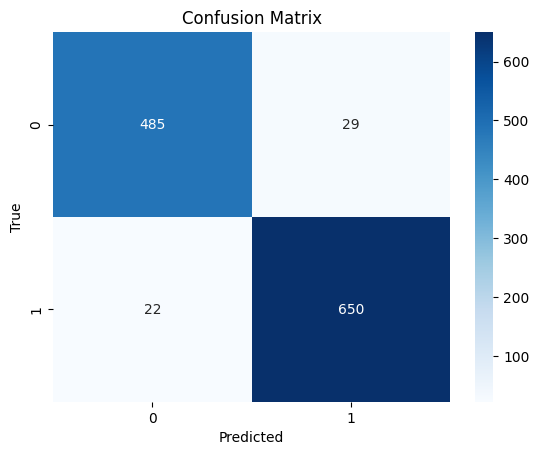

In [63]:
cm = confusion_matrix(yr_test,yr_rf_predicted_values)
# Plot the confusion matrix using seaborn
sys.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [64]:
"""##**Logistic Regression**"""

'##**Logistic Regression**'

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model_lr=LogisticRegression(solver='lbfgs', max_iter=1000)
model_lr.fit(x_train,y_train)


LogisticRegression(max_iter=1000)

In [67]:
y_lr_predicted_value=model_lr.predict(x_test)

In [68]:
# getting accuracy
model_lr.score(x_test,y_test)

0.8197303051809794

In [69]:
y_lr_predicted=model_lr.predict(x_test)
print(classification_report(y_test,y_lr_predicted))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1052
           1       0.65      0.61      0.63       357

    accuracy                           0.82      1409
   macro avg       0.76      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [70]:
"""**here even though we had 81% accuracy still our minority class f1 score recall precision still very low because of imbalanced data set.now let's rebalance the data set using upsampling + down sampling technique(SMOTEENN)**

**here below we don't need to re implement SMOTEEN() because we already implemented SMOTEEN() and realanced teh dataset in decision tree classifier.so we can use that dataset here.**
"""

#xr_lr_train,xr_lr_test,yr_lr_train,yr_lr_test=train_test_split(xr_lr_values,yr_lr_value)
model_lr_resampled=LogisticRegression(solver='lbfgs',max_iter=10000)

In [71]:
model_lr_resampled.fit(xr_train,yr_train)
model_lr_resampled.score(xr_test,yr_test)


0.9376053962900506

In [72]:
yr_lr_predicted_value=model_lr_resampled.predict(xr_test)
print(classification_report(yr_test,yr_lr_predicted_value))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       514
           1       0.94      0.95      0.95       672

    accuracy                           0.94      1186
   macro avg       0.94      0.94      0.94      1186
weighted avg       0.94      0.94      0.94      1186



In [73]:
confusion_matrix(yr_test,yr_lr_predicted_value)

array([[475,  39],
       [ 35, 637]])

In [74]:
##**XGBooost (gradient boost)**"""

from xgboost import XGBClassifier

In [75]:
model_xgb=XGBClassifier(use_label_encoder=False,eval_metrics='mlogloss')
model_xgb.fit(x_values,y_value)
model_xgb.score(x_test,y_test)


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[08:01:59] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_metrics" } are not used.



0.9318665720369056

In [76]:
y_xgb_predicted_value=model_xgb.predict(x_test)

In [77]:
print(classification_report(y_test,y_xgb_predicted_value))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1052
           1       0.89      0.83      0.86       357

    accuracy                           0.93      1409
   macro avg       0.92      0.90      0.91      1409
weighted avg       0.93      0.93      0.93      1409



In [78]:
"""**even though accuracy is 83% ,customer churn class(1) has low f1 score ,precision,accuracy.so we use SMOTEEN technique to rebalance the data set**

**here below we don't need to re implement SMOTEEN() because we already implemented SMOTEEN() and realanced teh dataset in decision tree classifier.so we can use that dataset here.**
"""

model_xgb_resampled=XGBClassifier(use_label_encoder=False,eval_metrics='mlogloss')

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [79]:
model_xgb_resampled.fit(xr_train,yr_train)
yr_xgb_predicted_val=model_xgb_resampled.predict(xr_test)
model_xgb_resampled.score(xr_test,yr_test)

[08:02:01] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_metrics" } are not used.



0.9595278246205734

In [80]:
print(classification_report(yr_test,yr_xgb_predicted_val))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       514
           1       0.96      0.97      0.96       672

    accuracy                           0.96      1186
   macro avg       0.96      0.96      0.96      1186
weighted avg       0.96      0.96      0.96      1186



In [81]:
metrics.accuracy_score(yr_test,yr_xgb_predicted_val)

0.9595278246205734

In [82]:
confusion_matrix(yr_test,yr_xgb_predicted_val)

array([[486,  28],
       [ 20, 652]])